In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [13]:
rgb_palette = [
    0x000000, 0x0000a8, 0x00a800, 0x00a8a8, 0xa80000, 0xa800a8, 0xa85400, 0xa8a8a8,
    0x545454, 0x5454fc, 0x54fc54, 0x54fcfc, 0xfc5454, 0xfc54fc, 0xfcfc54, 0xfcfcfc,
    0x000000, 0x141414, 0x202020, 0x2c2c2c, 0x383838, 0x444444, 0x505050, 0x606060,
    0x707070, 0x808080, 0x909090, 0xa0a0a0, 0xb4b4b4, 0xc8c8c8, 0xe0e0e0, 0xfcfcfc,
    0x0000fc, 0x4000fc, 0x7c00fc, 0xbc00fc, 0xfc00fc, 0xfc00bc, 0xfc007c, 0xfc0040,
    0xfc0000, 0xfc4000, 0xfc7c00, 0xfcbc00, 0xfcfc00, 0xbcfc00, 0x7cfc00, 0x40fc00,
    0x00fc00, 0x00fc40, 0x00fc7c, 0x00fcbc, 0x00fcfc, 0x00bcfc, 0x007cfc, 0x0040fc,
    0x7c7cfc, 0x9c7cfc, 0xbc7cfc, 0xdc7cfc, 0xfc7cfc, 0xfc7cdc, 0xfc7cbc, 0xfc7c9c,
    0xfc7c7c, 0xfc9c7c, 0xfcbc7c, 0xfcdc7c, 0xfcfc7c, 0xdcfc7c, 0xbcfc7c, 0x9cfc7c,
    0x7cfc7c, 0x7cfc9c, 0x7cfcbc, 0x7cfcdc, 0x7cfcfc, 0x7cdcfc, 0x7cbcfc, 0x7c9cfc,
    0xb4b4fc, 0xc4b4fc, 0xd8b4fc, 0xe8b4fc, 0xfcb4fc, 0xfcb4e8, 0xfcb4d8, 0xfcb4c4,
    0xfcb4b4, 0xfcc4b4, 0xfcd8b4, 0xfce8b4, 0xfcfcb4, 0xe8fcb4, 0xd8fcb4, 0xc4fcb4,
    0xb4fcb4, 0xb4fcc4, 0xb4fcd8, 0xb4fce8, 0xb4fcfc, 0xb4e8fc, 0xb4d8fc, 0xb4c4fc,
    0x000070, 0x1c0070, 0x380070, 0x540070, 0x700070, 0x700054, 0x700038, 0x70001c,
    0x700000, 0x701c00, 0x703800, 0x705400, 0x707000, 0x547000, 0x387000, 0x1c7000,
    0x007000, 0x00701c, 0x007038, 0x007054, 0x007070, 0x005470, 0x003870, 0x001c70,
    0x383870, 0x443870, 0x543870, 0x603870, 0x703870, 0x703860, 0x703854, 0x703844,
    0x703838, 0x704438, 0x705438, 0x706038, 0x707038, 0x607038, 0x547038, 0x447038,
    0x387038, 0x387044, 0x387054, 0x387060, 0x387070, 0x386070, 0x385470, 0x384470,
    0x505070, 0x585070, 0x605070, 0x685070, 0x705070, 0x705068, 0x705060, 0x705058,
    0x705050, 0x705850, 0x706050, 0x706850, 0x707050, 0x687050, 0x607050, 0x587050,
    0x507050, 0x507058, 0x507060, 0x507068, 0x507070, 0x506870, 0x506070, 0x505870,
    0x000040, 0x100040, 0x200040, 0x300040, 0x400040, 0x400030, 0x400020, 0x400010,
    0x400000, 0x401000, 0x402000, 0x403000, 0x404000, 0x304000, 0x204000, 0x104000,
    0x004000, 0x004010, 0x004020, 0x004030, 0x004040, 0x003040, 0x002040, 0x001040,
    0x202040, 0x282040, 0x302040, 0x382040, 0x402040, 0x402038, 0x402030, 0x402028,
    0x402020, 0x402820, 0x403020, 0x403820, 0x404020, 0x384020, 0x304020, 0x284020,
    0x204020, 0x204028, 0x204030, 0x204038, 0x204040, 0x203840, 0x203040, 0x202840,
    0x2c2c40, 0x302c40, 0x342c40, 0x3c2c40, 0x402c40, 0x402c3c, 0x402c34, 0x402c30,
    0x402c2c, 0x40302c, 0x40342c, 0x403c2c, 0x40402c, 0x3c402c, 0x34402c, 0x30402c,
    0x2c402c, 0x2c4030, 0x2c4034, 0x2c403c, 0x2c4040, 0x2c3c40, 0x2c3440, 0x2c3040,
    0x000000, 0x000000, 0x000000, 0x000000, 0x000000, 0x000000, 0x000000, 0x000000
]

In [22]:
def from_hexcode(hexcode):
    b = hexcode & 0xff
    g = (hexcode & 0x00ff00) >> 8
    r = (hexcode & 0xff0000) >> 16
    
    return [r, g, b]

palette = np.array([ from_hexcode(hexcode) for hexcode in rgb_palette ], dtype=np.float32) / 255.0

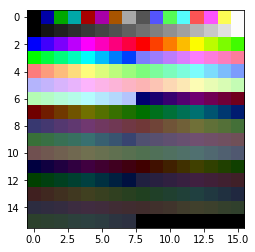

In [25]:
plt.imshow(palette.reshape(16,16, 3))
plt.show()

In [43]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(palette)

def nearest(color, neighbors):
    dist, indx = nbrs.kneighbors([color])
    return indx[0,0]

In [55]:
gradients = [ [ palette[nearest(palette[j]*(31-i)/31, nbrs)] for j in range(256)] for i in range(31) ]

In [56]:
gradients = np.array(gradients)
gradients.shape

(31, 256, 3)

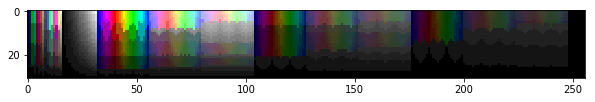

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(gradients)
plt.show()